In [144]:
# Step 1: Imports and Setup
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

In [145]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [146]:
# Step 2: Define the Custom Lexicon
custom_lexicon = {
    # Terms related to hiatus and breaks
    'hiatus': -2.0,
    'break': -1.8,
    'going their separate ways': -2.5,
    'time apart': -2.0,
    'second chapter': -1.0,  # Neutral or slightly negative

    # Terms related to military enlistment and challenges
    'military': -1.5,
    'service': -1.0,
    'enlistment': -2.0,
    'draft': -1.5,
    'mandatory': -1.2,
    'military requirement': -1.8,

    # Terms indicating sadness or loss
    'sad': -2.5,
    'tearful': -3.0,
    'exhausted': -2.5,
    'disbanding': -3.5,
    'farewell': -2.8,
    'tired': -2.0,

    # Fan emotions and financial concerns
    'infuriated': -3.0,
    'robbed': -2.8,
    'disappointment': -2.5,
    'challenge': -1.5,
    'struggle': -1.7,
    'fell': -2.0,  # Stock-related
    'dropped': -2.2,  # Stock-related

    # Context-specific phrases that suggest a mixed or negative sentiment
    'not be able to stay together': -2.8,
    'market seems to have priced in': -1.5,
    'divisive issue': -1.8,
    'less-active': -2.0,
    'pause': -1.7,
    'apart for a while': -1.5,
    'void': -2.5
} 


In [147]:
# Update VADER analyzer with the custom lexicon
analyzer.lexicon.update(custom_lexicon)


In [148]:
# Step 3: Load the Data from Excel File
file_path = 'preprocessed_file4.xlsx'  

# Update with correct path if necessary
try:
    data = pd.read_excel(file_path)
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}")

Data loaded successfully.


In [149]:
# Verify that the expected column is present
print("Columns in data:", data.columns)
if 'News ' not in data.columns:
    raise ValueError("The 'News' column is missing in the dataset.")

Columns in data: Index(['Event Date', 'Description', 'News ', 'Sentiment Score ',
       'Stock Price Before Event ', 'StockPrice After Event ',
       'Stock Price % CHANGE', 'Sentiment Category ', 'Processed Article'],
      dtype='object')


In [150]:
# Define a function to calculate sentiment scores and classify them
def analyze_sentiment(text):
    # Get sentiment scores
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']

In [151]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment scores and classify them
def analyze_sentiment(text):
    # Get sentiment scores
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']  # Ensure compound_score is assigned correctly
    
    # Classify based on compound score
    if compound_score >= 0.05:
        sentiment = "Positive"
    elif compound_score <= -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    
    # Return the compound score and sentiment
    return compound_score, sentiment


In [152]:
# Step 5: Apply Sentiment Analysis to Each News Article
# Create new columns for sentiment score and sentiment label
data[['compound_score', 'sentiment']] = data['News '].apply(
    lambda text: pd.Series(analyze_sentiment(str(text)))
)

In [153]:
# Check if the new columns were added
print("Data with Sentiment Scores:\n", data[['News ', 'compound_score', 'sentiment']].head())


Data with Sentiment Scores:
                                                News   compound_score sentiment
0  The shares are of high interest however are vo...          0.9963  Positive
1  Take a bow, BTS. The K-pop phenomenon have rec...          0.9913  Positive
2  BTS’s new single “Butter” has already broken a...          0.5417  Positive
3  Coldplay and BTS rocket onto the Billboard Hot...          0.8885  Positive
4  Between winning awards, commanding the stage a...          0.9947  Positive


In [154]:
# Set Pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(data)

   Event Date                                        Description  \
0  2020-10-15                                       Goes Public    
1  2021-03-04  IFPI artist of the year title sending stocks r...   
2  2021-05-21                                 BTS Butter release   
3  2021-10-05                         BTSxColdplay No.1 Bllboard   
4  2021-11-20                              American music awards   
5  2022-01-01                                    Another Hiatus    
6  2022-03-21                    Grammy peformance  announement    
7  2022-04-04                                   BTS lost grammy    
8  2022-06-07               Month in which Hiatus was announced    
9  2022-10-17       Lowest lows - Military enlistment announced.   
10 2023-03-27  Upward clmb- Jimin album billboard( peak 3rd a...   
11 2023-04-25  continous fall-Min hee jin press conference co...   

                                                News   Sentiment Score   \
0   The shares are of high interest howe

In [142]:
# Display final results to verify output
print("Final Data Preview:\n", data.head())



Final Data Preview:
 Empty DataFrame
Columns: [compound_score, Sentiment Numeric, Stock Price % CHANGE]
Index: []


In [143]:
# Step 7: Save Results to New Excel File
output_file = 'HYBE.xlsx'
try:
    data.to_excel(output_file, index=False)
    print(f"Sentiment analysis results saved to {output_file}")
except Exception as e:
    print(f"Error saving file: {e}")

Sentiment analysis results saved to HYBE.xlsx


In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
# Convert 'sentiment' text values to numerical values
sentiment_mapping = {"Positive": 1, "Negative": -1, "Neutral": 0}
data['Sentiment Numeric'] = data['sentiment'].map(sentiment_mapping)

# Check for any NaN values in the required columns and drop them
data = data[['Sentiment Numeric', 'Stock Price % CHANGE']].dropna()

In [157]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

In [158]:
# Display the correlation matrix
print(correlation_matrix)

                      Sentiment Numeric  Stock Price % CHANGE
Sentiment Numeric              1.000000              0.709681
Stock Price % CHANGE           0.709681              1.000000


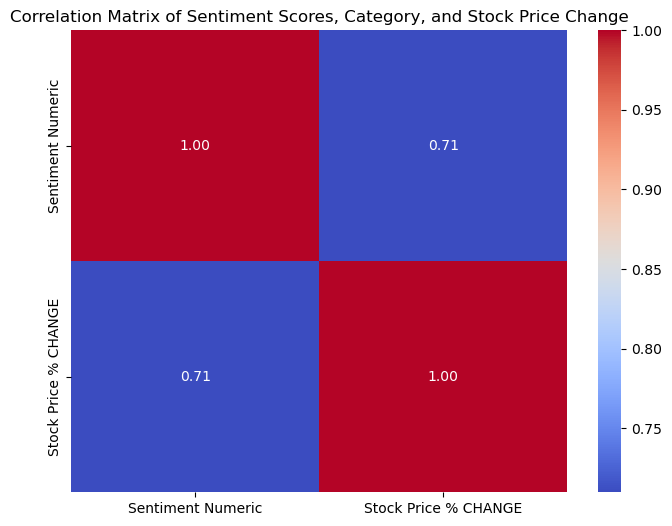

In [159]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Sentiment Scores, Category, and Stock Price Change")
plt.show()

In [161]:
#This indicates a strong positive correlation between Sentiment Numeric and Stock Price % CHANGE. Specifically:
#As the sentiment improves (from negative to positive), the stock price tends to increase.
#Conversely, if the sentiment is negative, it tends to be associated with a decrease in stock price. 

In [ ]:
Sentiment analysis done.